## Intermooring comparison
A. Dotson: S1

B. Central Trough: bsr12, istar1, trough W, bsr13a

In [1]:
import numpy as np
from numpy import ma

import xarray as xr
import pandas as pd
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.dates as mdates

from palettable.cmocean.diverging import Balance_19

import sys
import gsw

In [2]:
#-------------------------------------------------------------------
# Directories
#-------------------------------------------------------------------
voldir = '/Volumes/SamT5/PhD/data/'
mdir = voldir + 'moorings/dragomir_phd/'

figdir = '/Users/ocd1n16/PhD_local/data_figures/fig_paper1/'

localdir = '/Users/ocd1n16/PhD_git/'

auxscriptdir = localdir + 'aux_func/'
sys.path.append(auxscriptdir)
import aux_func_trend as fc
import aux_stereoplot as st
import aux_corr_maps as rmap

KeysView(<xarray.Dataset>
Dimensions:     (lon: 360, lat: 64, c: 570, clon: 360, clat: 360)
Coordinates:
  * lon         (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat         (lat) float64 -81.75 -81.25 -80.75 ... -51.25 -50.75 -50.25
  * clon        (clon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * clat        (clat) float64 -70.75 -70.75 -71.25 ... -71.75 -71.75 -72.75
  * c           (c) int64 0 1 2 3 4 5 6 7 8 ... 562 563 564 565 566 567 568 569
Data variables:
    bathy_mask  (lon, lat) float64 ...
    llon        (c) float64 ...
    llat        (c) float64 ...)
Defining map area ...

Getting coastlines north of 60 S ... 

Importing Antarctic Digital Database shapefile. 

KeysView(<xarray.Dataset>
Dimensions:    (lon: 360, lat: 56)
Coordinates:
  * lon        (lon) float64 180.5 181.5 182.5 183.5 ... 176.5 177.5 178.5 179.5
  * lat        (lat) float64 -77.75 -77.25 -76.75 ... -51.25 -50.75 -50.25
Data variables:
    elevation  (lon, la

In [4]:
dt_file = 'daily_dt_uv.nc'
ct_file = 'daily_ct_uv.nc'

bsr12_file = 'daily_bsr12_uv.nc'
bsr13_file = 'daily_bsr13_uv.nc'
istar1_file = 'daily_istar1_uv.nc'
troughW_file = 'daily_troughW_uv.nc'

# monthly along-trough (2010.03-2015.12)
au_file = 'amundsen_undercurrent_monthly_2010mar_2015dec.nc'

ctm_file = "monthly_ct_uv.nc"
dtm_file = "monthly_dt_uv.nc"

dt_d = xr.open_dataset(mdir + dt_file)
ct_d = xr.open_dataset(mdir + ct_file)

bsr12_d = xr.open_dataset(mdir + bsr12_file)
troughW_d = xr.open_dataset(mdir + troughW_file) 
istar1_d = xr.open_dataset(mdir + istar1_file)
bsr13_d = xr.open_dataset(mdir + bsr13_file)

au = xr.open_dataset(mdir + au_file)
dt_m = xr.open_dataset(mdir + dtm_file)
ct_m = xr.open_dataset(mdir + ctm_file)

In [5]:
moors = [dt_d, bsr12_d, bsr13_d, istar1_d, troughW_d]
moors_names = ['s1', 'bsr12', 'bsr13a', 
               'istar1', 'trough_w']

print('{:<15}'.format('moor name'),
      '{:<17}'.format('start date'),
      '{:<17}'.format('end date'))
for m, m_name in zip(moors, moors_names):
    print('{:<15}'.format(m_name),
          '{:<17}'.format(m.time[0].dt.strftime("%d-%m-%Y").values),
          '{:<17}'.format(m.time[-1].dt.strftime("%d-%m-%Y").values))

moor name       start date        end date         
s1              15-02-2010        17-01-2016       
bsr12           12-02-2009        07-01-2011       
bsr13a          07-01-2011        06-03-2012       
istar1          06-03-2012        02-03-2014       
trough_w        02-03-2014        07-02-2016       


### Variables to change

In [8]:
# time end points
tim_start = '2010-03-01'
tim_end = '2015-12-31'

# window size of rolling mean filter
nfilt = 20

savefig = False

## PLOT of daily time series of DT and CT along-trough velocity

In [9]:
dt_filt = dt_d.rolling(time=nfilt, min_periods=1, center=True).mean()

ct_crop = ct_d.sel(time=slice(dt_d.time[0], dt_d.time[-1]))
ct_filt = ct_crop.rolling(time=nfilt, min_periods=1, center=True).mean()
a = ct_filt.sel(time=slice(bsr12_d.time[0], bsr12_d.time[-1]))
b = ct_filt.sel(time=slice(bsr13_d.time[0], bsr13_d.time[-1]))
c = ct_filt.sel(time=slice(istar1_d.time[0], istar1_d.time[-1]))
d = ct_filt.sel(time=slice(troughW_d.time[0], troughW_d.time[-1]))

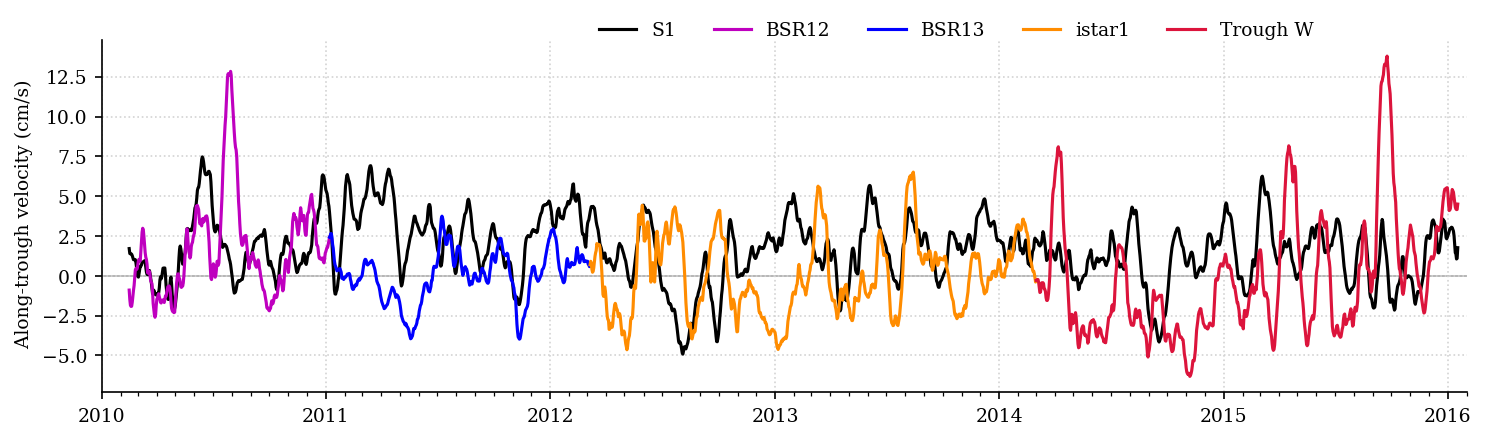

In [11]:
xtim = pd.date_range('2010-02-01', '2016-02-01', freq='1MS')

fig, ax = plt.subplots(figsize=(10, 3), dpi=150)

ax.plot(dt_filt.time, dt_filt.u_rot, c='k', label='S1', zorder=2)
ax.plot(a.time, a.u, c='m', label='BSR12')
ax.plot(b.time, b.u, c='blue', label='BSR13')
ax.plot(c.time, c.u, c='darkorange', label='istar1')
ax.plot(d.time, d.u, c='crimson', label='Trough W')

ax.axhline(0, c='darkgrey', lw=.8, zorder=1)
ax.set_ylabel(" Along-trough velocity (cm/s)")
ax.set_xticks(xtim, minor=True)
ax.grid(True, which="major", 
      c='lightgrey', ls=':', zorder=1)
ax.set_xlim(pd.to_datetime('2010-01-01'), 
  pd.to_datetime('2016-02-01'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(ncol=5, bbox_to_anchor=(.1,1.,.8,.1), framealpha=0)
plt.tight_layout()
if savefig:
    fig.savefig(figdir + 'moorings_daily_filt.png', dpi=300, bbox_inches="tight")

# Correlation coefficient between moorings

Mean flow dir(daily avg): -9.308204756827198
Mean flow dir(monthly avg): -31.631572773100633


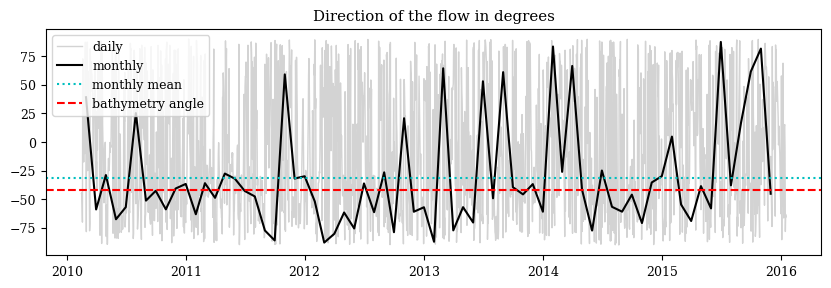

In [9]:
# direction of the flow - S1
angle_d = np.arctan(dt_d.v / dt_d.u) * 180 / np.pi
angle_m = np.arctan(dt_m.v / dt_m.u) * 180 / np.pi

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)
ax.plot(dt_d.time, angle_d, c='lightgrey', lw=1, label='daily')
ax.plot(dt_m.time, angle_m, c='k', label='monthly')
ax.axhline(angle_m.mean(), ls=':', c='c', label="monthly mean")
ax.axhline(-42, ls='--', c='r', label='bathymetry angle')
ax.legend()
ax.set_title("Direction of the flow in degrees")

print("Mean flow dir(daily avg): %s" % str(np.nanmean(angle_d.values)))
print("Mean flow dir(monthly avg): %s" % str(angle_m.values.mean()))

### Correlation coefficient between S1 and CT components (daily)

In [12]:
def r_moors(moor1, moor2):
    # crop them to the same time period
    a1, a2 = rmap.crop_arrays(moor1, moor2)
    
    # subtract time means
    a1 = a1 - a1.mean()
    a2 = a2 - a2.mean()
    
    # de-trend
    a1_trend, a1_det = fc.trend_ci(a1, 0.95)
    a2_trend, a2_det = fc.trend_ci(a2, 0.95)
    
    print("\n> > > > First time series")
    print('slope: %.4f cm/s/yr' % (a1_trend.slope.values * 365.25))
    print('ci: %.4f cm/s/yr' % (a1_trend.ci.values * 365.25))
    print('p-val: %.4f cm/s/yr' % (a1_trend.p_val.values))
    
    print("\n> > > > Second time series")
    print('slope: %.4f cm/s/yr' % (a2_trend.slope.values * 365.25))
    print('ci: %.4f cm/s/yr' % (a2_trend.ci.values * 365.25))
    print('p-val: %.4f cm/s/yr' % (a2_trend.p_val.values))
    
    # r, p-value
    r, p = fc.pearsonr_nan(a1_det, a2_det)
    print("\nCorrelation coef (p-value) : %.7f (%.7f)" % (r, p))
    
    # filter the daily time series
    a1_filt = a1.rolling(time=nfilt, min_periods=1, center=True).mean()
    a2_filt = a2.rolling(time=nfilt, min_periods=1, center=True).mean()
    
    r2, p2 = rmap.pearsonr_filt(a1_filt, a2_filt, nfilt)
    print("\nCorrelation coef (p-value) [filtered timeseries] : %.7f (%.7f)" % (r2, p2))
    
    a1_res = a1.resample(time='20D').mean()
    a2_res = a2.resample(time='20D').mean()
    
    r3, p3 = fc.pearsonr_nan(a1_res, a2_res)
    print("\nCorrelation coef (p-value) (20-day average) : %.7f (%.7f)" % (r3, p3))
    return 

In [13]:
r_moors(dt_d.u_rot, bsr12_d.u_rot)

Time period: 
2010-02-15 2011-01-07

> > > > First time series
slope: 2.5165 cm/s/yr
ci: 1.5608 cm/s/yr
p-val: 0.0017 cm/s/yr

> > > > Second time series
slope: 2.6677 cm/s/yr
ci: 2.2754 cm/s/yr
p-val: 0.0217 cm/s/yr

Correlation coef (p-value) : 0.1477650 (0.0074389)

Correlation coef (p-value) [filtered timeseries] : 0.1620252 (0.5173186)

Correlation coef (p-value) (20-day average) : 0.1997320 (0.4421408)


In [14]:
r_moors(dt_d.u_rot, bsr13_d.u_rot)

Time period: 
2011-01-07 2012-03-06

> > > > First time series
slope: -0.4700 cm/s/yr
ci: 1.0561 cm/s/yr
p-val: 0.3822 cm/s/yr

> > > > Second time series
slope: 1.0706 cm/s/yr
ci: 0.7911 cm/s/yr
p-val: 0.0081 cm/s/yr

Correlation coef (p-value) : 0.0407661 (0.4024265)

Correlation coef (p-value) [filtered timeseries] : 0.1007267 (0.6462598)

Correlation coef (p-value) (20-day average) : 0.1238964 (0.5827804)


In [15]:
r_moors(dt_d.u_rot, istar1_d.u_rot)

Time period: 
2012-03-06 2014-03-02

> > > > First time series
slope: 0.9866 cm/s/yr
ci: 0.4335 cm/s/yr
p-val: 0.0000 cm/s/yr

> > > > Second time series
slope: 0.5813 cm/s/yr
ci: 0.5821 cm/s/yr
p-val: 0.0503 cm/s/yr

Correlation coef (p-value) : 0.0139100 (0.7080865)

Correlation coef (p-value) [filtered timeseries] : 0.0214773 (0.8978035)

Correlation coef (p-value) (20-day average) : -0.0902275 (0.5953631)


In [16]:
r_moors(dt_d.u_rot, troughW_d.u_rot)

Time period: 
2014-03-02 2016-01-17

> > > > First time series
slope: 0.2300 cm/s/yr
ci: 0.4925 cm/s/yr
p-val: 0.3595 cm/s/yr

> > > > Second time series
slope: 2.7970 cm/s/yr
ci: 0.8230 cm/s/yr
p-val: 0.0000 cm/s/yr

Correlation coef (p-value) : 0.1290870 (0.0006951)

Correlation coef (p-value) [filtered timeseries] : 0.0969798 (0.5722320)

Correlation coef (p-value) (20-day average) : 0.1782180 (0.3056982)


In [17]:
r_moors(ct_d.u, dt_d.u_rot.sel(time=slice(None, '2015-02-01')) )

Time period: 
2010-02-15 2015-02-01

> > > > First time series
slope: -0.5809 cm/s/yr
ci: 0.1459 cm/s/yr
p-val: 0.0000 cm/s/yr

> > > > Second time series
slope: -0.2420 cm/s/yr
ci: 0.1165 cm/s/yr
p-val: 0.0000 cm/s/yr

Correlation coef (p-value) : 0.0573445 (0.0146329)

Correlation coef (p-value) [filtered timeseries] : 0.1305620 (0.2133863)

Correlation coef (p-value) (20-day average) : 0.1580711 (0.1345280)


## 20-day average time series

In [42]:
ct_crop = ct_d.sel(time=slice(dt_d.time[0], dt_d.time[-1]))
ct_crop = ct_d.sel(time=slice(dt_d.time[0], '2015-02-01'))
ct_res = ct_crop.u.resample(time='20D').mean()
dt_res = dt_d.u_rot.resample(time='20D').mean()

r, p = fc.pearsonr_nan(ct_res, dt_res)
print("\nCorrelation coef (p-value) [20-day avg] : %.7f (%.7f)" % (r, p))


Correlation coef (p-value) [20-day avg] : 0.1552225 (0.1417841)


#### monthly time series

In [16]:
r, p = fc.pearsonr_nan(au.dt_anom_det, au.ct_anom_det)
print("\nCorrelation coef (p-value) [monthly] : %.7f (%.7f)" % (r, p))


Correlation coef (p-value) [monthly] : 0.0736308 (0.5446674)


In [42]:
# do the two sites correlate if the end of 2015 is left out? 
au_crop = au.sel(time=slice('2010-03-01', '2015-02-01'))

r, p = fc.pearsonr_nan(au_crop.dt_anom_det, au_crop.ct_anom_det)
print("\nCorrelation coef (p-value) [monthly] : %.7f (%.7f)" % (r, p))

# with lag

r, p = fc.pearsonr_nan(au_crop.dt_anom_det.shift(time=-1), au_crop.ct_anom_det)
print("\nCorrelation coef (p-value) [monthly w lag] : %.7f (%.7f)" % (r, p))


Correlation coef (p-value) [monthly] : 0.1285577 (0.3276168)

Correlation coef (p-value) [monthly w lag] : -0.2299225 (0.0798022)


##  lag correlations

If CT lags behind DT by 1 month, then the correlation coeff becomes -0.23 (p=0.05) which is the most I've seen the two time series agree; why the anticorrelation though and how does it make sense with SLA maps?


Correlation coef (p-value) [monthly w lag] : -0.2350975 (0.0518305)


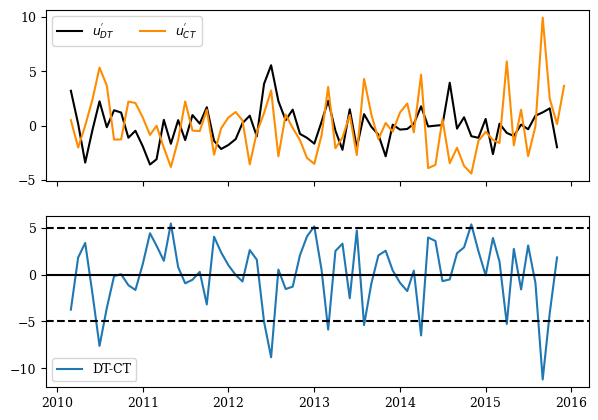

In [18]:
var1 = au.dt_anom_det.shift(time=-1)
var2 = au.ct_anom_det
var_diff = var1 - var2

r, p = fc.pearsonr_nan(var1, var2)
print("\nCorrelation coef (p-value) [monthly w lag] : %.7f (%.7f)" % (r, p))

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, dpi=100, figsize=(7, 5))
ax1.plot(var1.time, (-1)*var1.values, c='k', label='$u^{\'}_{DT}$')
ax1.plot(var2.time, var2.values, c='darkorange', label='$u^{\'}_{CT}$')
ax1.legend(ncol=2)
ax2.plot(var_diff.time, var_diff, label='DT-CT')
ax2.axhline(0, c='k')
ax2.axhline(-5, c='k', ls='--')
ax2.axhline(5, c='k', ls='--')
ax2.legend()


Correlation coef (p-value) [monthly w lag] : 0.3041289 (0.0145554)


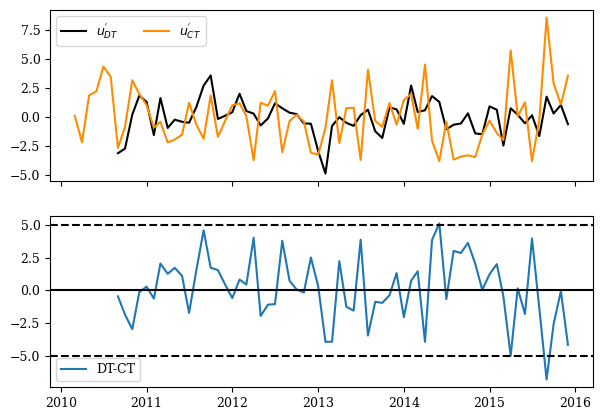

In [19]:
au_mclim = au.groupby("time.month") - au.groupby('time.month').mean()

var1 = au_mclim.dt_anom_det.shift(time=6)
var2 = au_mclim.ct_anom_det
var_diff = var1 - var2

r, p = fc.pearsonr_nan(var1, var2)
print("\nCorrelation coef (p-value) [monthly w lag] : %.7f (%.7f)" % (r, p))

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, dpi=100, figsize=(7, 5))
ax1.plot(var1.time, var1.values, c='k', label='$u^{\'}_{DT}$')
ax1.plot(var2.time, var2.values, c='darkorange', label='$u^{\'}_{CT}$')
ax1.legend(ncol=2)
ax2.plot(var_diff.time, var_diff, label='DT-CT')
ax2.axhline(0, c='k')
ax2.axhline(-5, c='k', ls='--')
ax2.axhline(5, c='k', ls='--')
ax2.legend()

### no lag

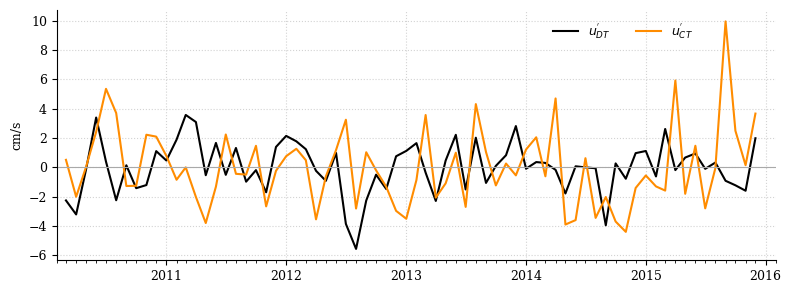

In [20]:
xtim = pd.date_range(pd.to_datetime('2010-02-01'), 
  pd.to_datetime('2016-02-01'), freq='1MS')

fig, ax = plt.subplots(dpi=100, figsize=(8, 3))

ax.plot(au.time, au.dt_anom_det.values, c='k', label='$u^{\'}_{DT}$')
ax.plot(au.time, au.ct_anom_det.values, c='darkorange', label='$u^{\'}_{CT}$')

ax.axhline(0, c='darkgrey', lw=.8, zorder=2)
ax.set_xticks(xtim, minor=True)
ax.grid(True, which="major", 
      c='lightgrey', ls=':', zorder=1)
ax.set_xlim(pd.to_datetime('2010-02-01'), 
  pd.to_datetime('2016-02-01'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(ncol=2, bbox_to_anchor=(.1,.9,.8,.1), framealpha=0)
ax.set_ylabel("cm/s")

plt.tight_layout()
if savefig:
    fig.savefig(figdir + 'moorings_monthly.png')

In [25]:
au

<xarray.Dataset>
Dimensions:            (time: 70)
Coordinates:
  * time               (time) datetime64[ns] 2010-03-01 ... 2015-12-01
Data variables:
    dt                 (time) float64 ...
    dt_anom            (time) float64 ...
    dt_anom_det        (time) float64 -2.263 -3.22 -0.1707 ... -1.229 -1.6 1.985
    dt_anom_det_stand  (time) float64 ...
    ct                 (time) float64 ...
    ct_anom            (time) float64 ...
    ct_anom_det        (time) float64 0.5104 -2.013 0.009361 ... 0.1414 3.669
    ct_anom_det_stand  (time) float64 ...
Attributes:
    units:    cm/s

In [21]:
def add_lag(var, lag):
    var_lag = var.shift(time=lag)   
    return var_lag

In [28]:
a = np.diff(au.dt_anom)

In [29]:
a

array([-0.97470879,  3.03171559,  3.55310063, -3.03353311, -2.65314351,
        2.37025455, -1.58037978,  0.19398619,  2.30015964, -0.65910893,
        1.40522314,  1.67277826, -0.50172193, -3.64986983,  2.18746357,
       -2.19677847,  1.81644922, -2.32031209,  0.77135325, -1.53158521,
        3.07974461,  0.73658934, -0.38879249, -0.5559056 , -1.49393553,
       -0.70219837,  1.88839585, -4.86498103, -1.7254135 ,  3.28527111,
        1.74930005, -0.99798702,  2.219123  ,  0.34835524,  0.51248116,
       -2.03347813, -1.94978912,  2.74116744,  1.74039572, -3.75122121,
        3.51973866, -3.10676572,  1.14517306,  0.71046493,  1.97413355,
       -2.93311104,  0.43721046, -0.07416158, -0.49161617, -1.63009945,
        1.83772965, -0.09223904, -0.07649315, -3.91331285,  4.2079402 ,
       -1.06469315,  1.73003   ,  0.12996227, -1.75643414,  3.22611011,
       -2.82750564,  0.83960275,  0.26063973, -1.06616168,  0.40993575,
       -1.26326175, -0.32579835, -0.3889764 ,  3.56807434])

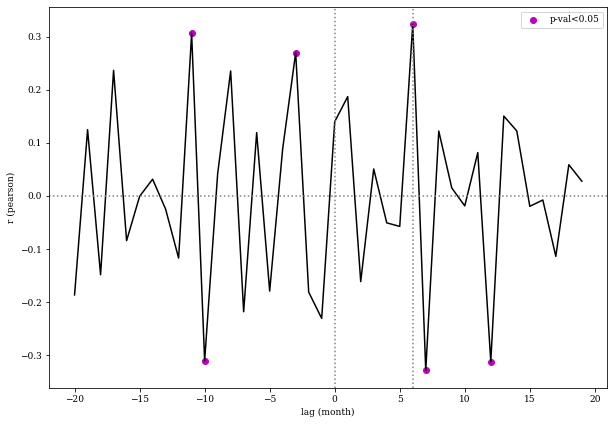

In [33]:
a = au.dt_anom.diff("time")
b = au.ct_anom.diff("time")
corr_i, pval_i = [np.ones((40,)) for _ in range(2)]

i = 0
for lag in range(-20, 20):
    a_lag = add_lag(a.copy(), lag)
    corr_i[i], pval_i[i] = fc.pearsonr_nan(b.copy(), a_lag)
    
    i += 1
    
fig, ax= plt.subplots(figsize=(10,7))
ax.plot(np.arange(-20, 20), corr_i, c='k')
ax.scatter(np.arange(-20, 20)[pval_i<0.05], corr_i[pval_i<0.05], c='m', label='p-val<0.05')
ax.axhline(0, ls=':', c='grey')
ax.axvline(0, ls=':', c='grey')
ax.axvline(6, ls=':', c='grey')
ax.set_xlabel('lag (month)')
ax.set_ylabel('r (pearson)')
ax.legend()

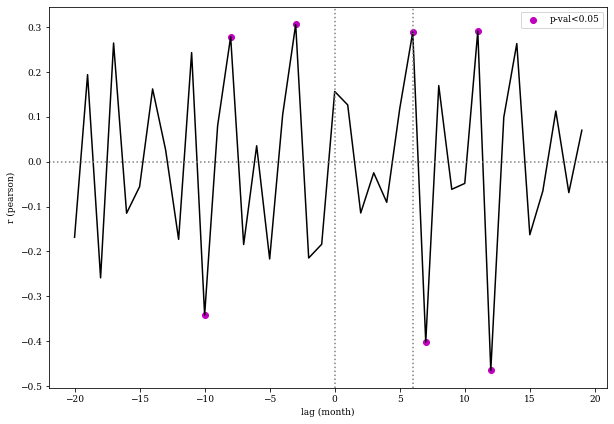

In [34]:
a = au_mclim.dt_anom.diff("time")
b = au_mclim.ct_anom.diff("time")
corr_i, pval_i = [np.ones((40,)) for _ in range(2)]

i = 0
for lag in range(-20, 20):
    a_lag = add_lag(a.copy(), lag)
    corr_i[i], pval_i[i] = fc.pearsonr_nan(b.copy(), a_lag)
    
    i += 1
    
fig, ax= plt.subplots(figsize=(10,7))
ax.plot(np.arange(-20, 20), corr_i, c='k')
ax.scatter(np.arange(-20, 20)[pval_i<0.05], corr_i[pval_i<0.05], c='m', label='p-val<0.05')
ax.axhline(0, ls=':', c='grey')
ax.axvline(0, ls=':', c='grey')
ax.axvline(6, ls=':', c='grey')
ax.set_xlabel('lag (month)')
ax.set_ylabel('r (pearson)')
ax.legend()

## mean seasonal cycle - comparison

## Question: Does the mean seasonal cycle have a meaning for CT if it's made up of individual moorings that have the time mean removed?

In [ ]:
x1 = mts1_meanseas.rot_u
x2 = ctm_meanseas

fig, ax = plt.subplots()
xr.plot.plot(x1, label='DT', c='k', marker='o', lw=1)
ax.fill_between(mts1_std.month.data, 
                x1-mts1_std.rot_u*1e2,
                x1+mts1_std.rot_u*1e2,
               color='lightgrey')
xr.plot.plot(x2, label='CT', c='m', marker='x', lw=1)
ax.fill_between(mts1_std.month.data, 
                x2-ctm_std,
                x2+ctm_std,
               color='plum', alpha=0.3)
ax.legend()

pearsonr(x1, x2)

In [ ]:
a = x1.data
b = np.append(x2.data[1:], x2.data[0])

fig, ax = plt.subplots()
ax.plot(np.arange(1, 13), a)
ax.plot(np.arange(1, 13), b)
pearsonr(a, b)

## Autocorrelation

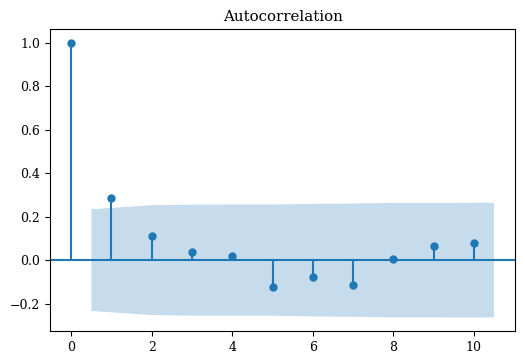

In [36]:
from statsmodels.graphics import tsaplots

#  DT - monthly
fig, ax = plt.subplots(dpi=100)
fig = tsaplots.plot_acf(dt_m.u_rot.data, ax=ax, lags=10)
plt.show()

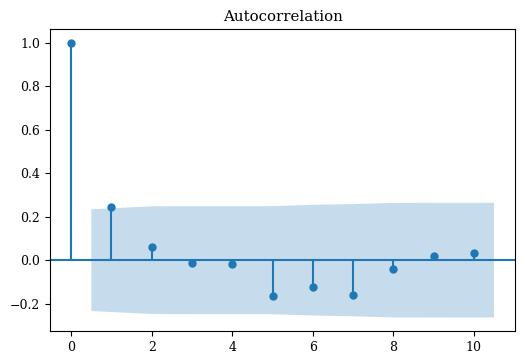

In [45]:
#  DT - monthly
fig, ax = plt.subplots(dpi=100)
fig = tsaplots.plot_acf(au.dt_anom_det.data, ax=ax, lags=10)
plt.show()

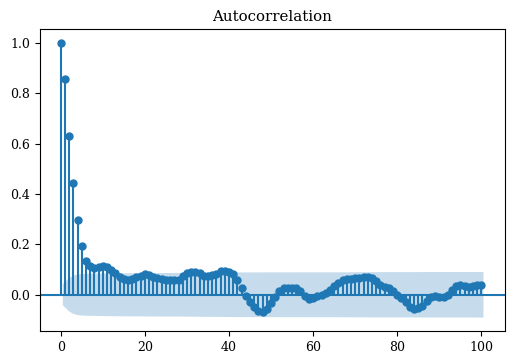

In [37]:
# there's a missing value at position 745; do a quick interp
a = dt_d.u_rot.values
a[745] = 0.5*(a[744] + a[746])

fig, ax = plt.subplots(dpi=100)
fig = tsaplots.plot_acf(a, ax=ax, lags=100)
plt.show()

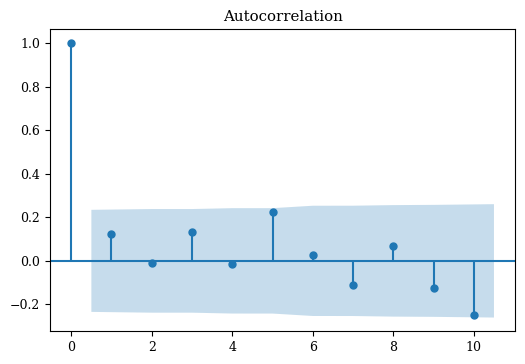

In [38]:
# CT - monthly
fig, ax = plt.subplots(dpi=100)
fig = tsaplots.plot_acf(ct_m.u.data, ax=ax, lags=10)
plt.show()

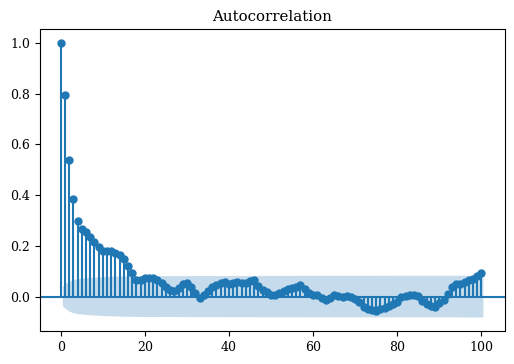

In [39]:
#CT - daily
fig, ax = plt.subplots(dpi=100)
fig = tsaplots.plot_acf(ct_d.u.data, ax=ax, lags=100)
plt.show()

In [ ]:
# direction of the flow - bsr12
angle_d = np.arctan(bsr12_d.v / bsr12_d.u) * 180 / np.pi
angle_m = np.arctan(bsr12_m.v / bsr12_m.u) * 180 / np.pi

fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.scatter(bsr12_d.time, angle_d, c='grey')
ax.plot(bsr12_m.time, angle_m, c='k')
ax.axhline(0, ls=':')

print("Mean flow dir(daily avg): %s" % str(angle_d.values.mean()))
print("Mean flow dir(monthly avg): %s" % str(angle_m.values.mean()))

In [40]:
# direction of the flow - bsr13
angle_d = np.arctan(bsr13_d.v / bsr13_d.u) * 180 / np.pi
angle_m = np.arctan(bsr13_m.v / bsr13_m.u) * 180 / np.pi

fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.scatter(bsr13_d.time, angle_d, c='grey')
ax.plot(bsr13_m.time, angle_m, c='k')
ax.axhline(0, ls=':')

print("Mean flow dir(daily avg): %s" % str(angle_d.values.mean()))
print("Mean flow dir(monthly avg): %s" % str(angle_m.values.mean()))

NameError: name 'bsr13_m' is not defined

In [ ]:
# direction of the flow - istar1
angle_d = np.arctan(istar1_d.v / istar1_d.u) * 180 / np.pi
angle_m = np.arctan(istar1_m.v / istar1_m.u) * 180 / np.pi

fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.scatter(istar1_d.time, angle_d, c='grey')
ax.plot(istar1_m.time, angle_m, c='k')
ax.axhline(0, ls=':')

print("Mean flow dir(daily avg): %s" % str(angle_d.values.mean()))
print("Mean flow dir(monthly avg): %s" % str(angle_m.values.mean()))

In [ ]:
# direction of the flow - troughW
angle_d = np.arctan(troughW1_d.v / troughW1_d.u) * 180 / np.pi
angle_m = np.arctan(troughW1_m.v / troughW1_m.u) * 180 / np.pi

fig, ax = plt.subplots(figsize=(5, 3), dpi=100)
ax.scatter(troughW1_d.time, angle_d, c='grey')
ax.plot(troughW1_m.time, angle_m, c='k')
ax.axhline(0, ls=':')

print("Mean flow dir(daily avg): %s" % str(angle_d.values.mean()))
print("Mean flow dir(monthly avg): %s" % str(angle_m.values.mean()))

### Coherence - monthly S1 & CT
I think there is no coherence at all

In [41]:
from scipy import signal

### Coherence - daily S1 & CT
No significant coherence between daily timeseries of the speed at the two locations

significant coh around 15 days for daily along-trough (bathym angle)

In [42]:
y01 = dt_res
y02 = ct_res

nseg = 39
y1 = y01 / y01.std(ddof=1)
y2 = y02 / y02.std(ddof=1)
f, Cxy = signal.coherence(y1, y2, fs=1.0, nperseg=nseg)

alpha = 0.05
edof = len(y1) / nseg
ci = 1 - alpha**(1/(edof-1))

fig, ax = plt.subplots(figsize=(7, 4), dpi=100)
ax.plot(1/f[1:], Cxy[1:], c='k')
ax.axhline(ci, c='m')
ax.set_xlabel('Frequency (day)')
ax.set_ylabel(r'Coherence$^2$')

# day ticks
ax.set_xticks(np.arange(nseg, step=1), minor=True)
ax.grid(True, which='minor', c='dimgrey',ls=':', lw=.5)
ax.grid(True, which='major', c='dimgrey',ls='-', lw=.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
#fig.savefig(figdir + 'pig_uc_filt.png')

NameError: name 'dt_res' is not defined